In [2]:
import dolfin as dl
from dolfin import *

In [3]:
mesh = dl.UnitIntervalMesh(101)
V = FunctionSpace(mesh, "CG", 1)

In [4]:
def ud_boundary(x, on_boundary):
    return on_boundary

# Define boundary conditions
ud = dl.Constant('0.0')
bc = dl.DirichletBC(V, ud, ud_boundary)

In [5]:
v = TestFunction(V)
u = TrialFunction(V)

q = dl.Constant(1.)
qx = dl.Constant(0.)
utrue = Expression('sin(2*pi*x[0]) * sin(2*pi*x[0])', degree=3)
utx = Expression('4 * pi * sin(2*pi*x[0]) * cos(2*pi*x[0])', degree=3)
utxx = Expression('-8*pi*pi*( sin(2*pi*x[0]) * sin(2*pi*x[0]) - cos(2*pi*x[0]) * cos(2*pi*x[0]) )', degree=3)

f = -qx*utx - q*utxx

In [6]:
a = q * dot(grad(v), grad(u))*dx
L = v*f*dx

A, b = dl.assemble_system(a, L, bc)
M = dl.assemble(v*u*dx)

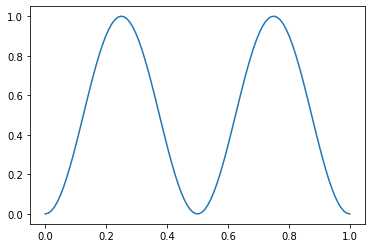

In [11]:
uh = Function(V)
solve(A, uh.vector(), b)

ud = dl.Function(V)
ud.assign(utrue)

dl.plot(uh)

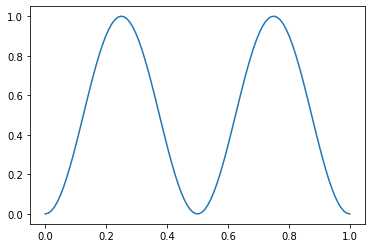

In [15]:
ut = dl.interpolate(utrue, V)
dl.plot(ut)